# Import important libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import zscore
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score,\
                            precision_score,roc_curve,f1_score,auc,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

You can access from https://www.kaggle.com/uciml/german-credit

Read input file and understand the data

"default" is my dependent variable

In [2]:
df = pd.read_csv('german_credit.csv')

In [3]:
print('Given data-set has: %d data points and %d features/dimensions(including any target variable)'%(df.shape[0],df.shape[1]))

Given data-set has: 1000 data points and 21 features/dimensions(including any target variable)


In [4]:
df.head(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

The given data-set predominantly has following data-types

    > numeric 
    > object(category)

### Check for missing values

In [6]:
df.isna().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

Data-set has no missing values

### Analysis for data-type numeric


In [7]:
num_df = df.select_dtypes(exclude=np.object)
num_df.columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance'],
      dtype='object')

In [8]:
print('number of numeric columns are:{}'.format(num_df.shape[1]))

number of numeric columns are:8


In [9]:
num_df.head(3)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
0,0,6,1169,4,4,67,2,1
1,1,48,5951,2,2,22,1,1
2,0,12,2096,2,3,49,1,2


In [10]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


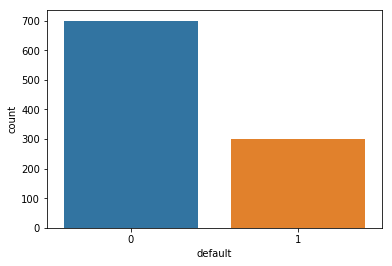

In [11]:
sns.countplot(data=num_df,x='default')

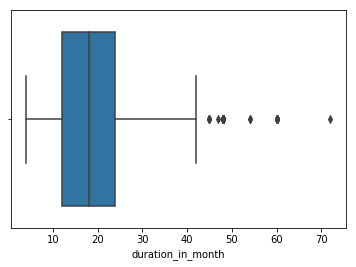

In [12]:
sns.boxplot(data=num_df, x='duration_in_month',hue='default')

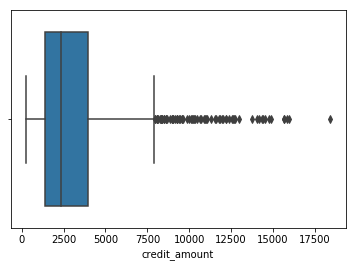

In [13]:
sns.boxplot(data=num_df, x='credit_amount',hue='default')

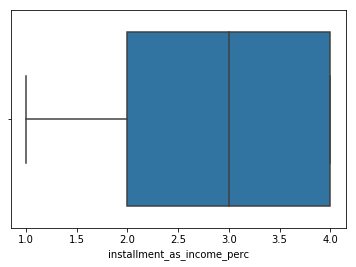

In [14]:
sns.boxplot(data=num_df, x='installment_as_income_perc',hue='default')

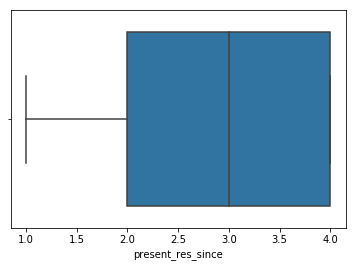

In [15]:
  
sns.boxplot(data=num_df, x='present_res_since',hue='default')

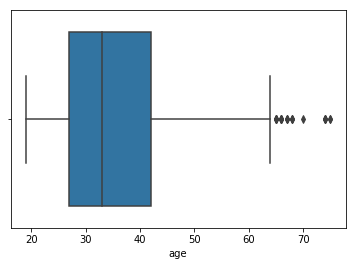

In [16]:
sns.boxplot(data=num_df, x='age',hue='default')

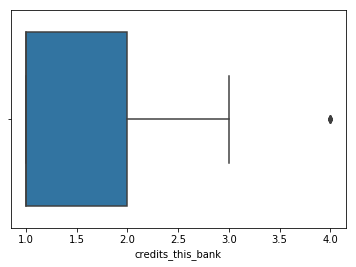

In [17]:
sns.boxplot(data=num_df, x='credits_this_bank',hue='default')

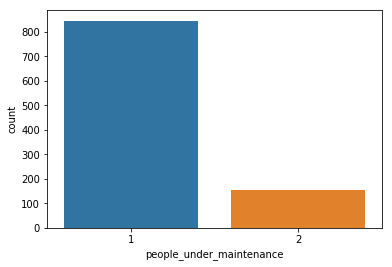

In [18]:
sns.countplot(data=num_df, x='people_under_maintenance')

###### Inference:

* Columns 'default' & 'people_under_maintenance' are of more categorical representation, hence checked for it's frequencies
* None of the other numeric data-type columns has it's distribution as Gaussian/Normal
* Columns 'duration_in_month', credit_amount, 'age' has quite amount of outliers in it's data-points and probably right skewed distribution
* Columns 'installment_as_income_perc' & 'present_res_since' doesn't have outliers and probably left skewed

### Analysis for data-type object/categorical

In [19]:
obj_df = df.select_dtypes(include=np.object)
obj_df.columns

Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'],
      dtype='object')

In [20]:
print('number of object/categorical columns are:{}'.format(obj_df.shape[1]))

number of object/categorical columns are:13


In [21]:
for col in obj_df.columns:
    print(obj_df[col].value_counts())
    print('\n')

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64


existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: credit_history, dtype: int64


domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                         97
(vacation - does not exist?)     50
education                        22
repairs                          12
furniture/equipment              12
retraining                   

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [22]:
# Lets build a Ensemble model but need to modify the dataset first

#### Not able to understand  why 50% split have been asked as Q1, 
    * As logically presume that the variable shall be handled/converted appropiately for all the data-set then split shall
      have been asked for.

#### Also, could infer below that again in Q3 the split is asked after coversion. As the task is being repeated, considering the Q3 and ignoring the Q1(as data processing comes before the model building in the the process)



### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [23]:
#Get new data-frame for dummy var
# Also, set drop_first to avoid dummy variable trap,multicollinearity
df_obj_conv = pd.get_dummies(data=obj_df,drop_first=True)

Also, rather instead of getting new dummy data-frame, 
the original dataframe itself shall be used for .get_dummies() as an argument.

As per the task requested, getting new dummy dataframe from object dataframe then performing conversion. 
Later adding it to original dataframe and droping the original object column that had been converted from the original data-frame

It is also better to have dataframe that has actual and enigneered features in the same data-frame for references and readability


In [24]:
# Print Shape of model data

In [25]:
print('Shape of object data-set after conversion are:{}'.format(df_obj_conv.shape))

Shape of object data-set after conversion are:(1000, 41)


In [26]:
# object/catergorical columns after conversion
df_obj_conv.columns

Index(['account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_retraining', 'savings_... < 100 DM',
       'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM ',
       'savings_unknown/ no savings account',
       'present_emp_since_... < 1 year ',
       'present_emp_since_1 <= ... < 4 years',
       'present_emp_since_4 <= ... < 7 years', 'present_emp_since_unemployed',

In [27]:
# Original columns of the given data-set
df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [28]:
# add new dummy var to orignial data-frame
for col in df_obj_conv.columns:
    df[col] = df_obj_conv[col]

In [29]:
print('new dimensions for orignal data-frame are:{}'.format(df.shape))

new dimensions for orignal data-frame are:(1000, 62)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
account_check_status                                                          1000 non-null object
duration_in_month                                                             1000 non-null int64
credit_history                                                                1000 non-null object
purpose                                                                       1000 non-null object
credit_amount                                                                 1000 non-null int64
savings                                                                       1000 non-null object
present_emp_since                                                             1000 non-null object
installment_as_income_perc                                                    1000 non-null int64
persona

### Check for highly correlated variables but don't required any treatment for this use case

In [31]:
df_corr = df.corr()

In [32]:
# Here to understand the highly correlated variable, randomly use the correlation threshold as 0.5
corr_th = 0.5
mask = (df_corr >= corr_th) | (df_corr <= -corr_th) 

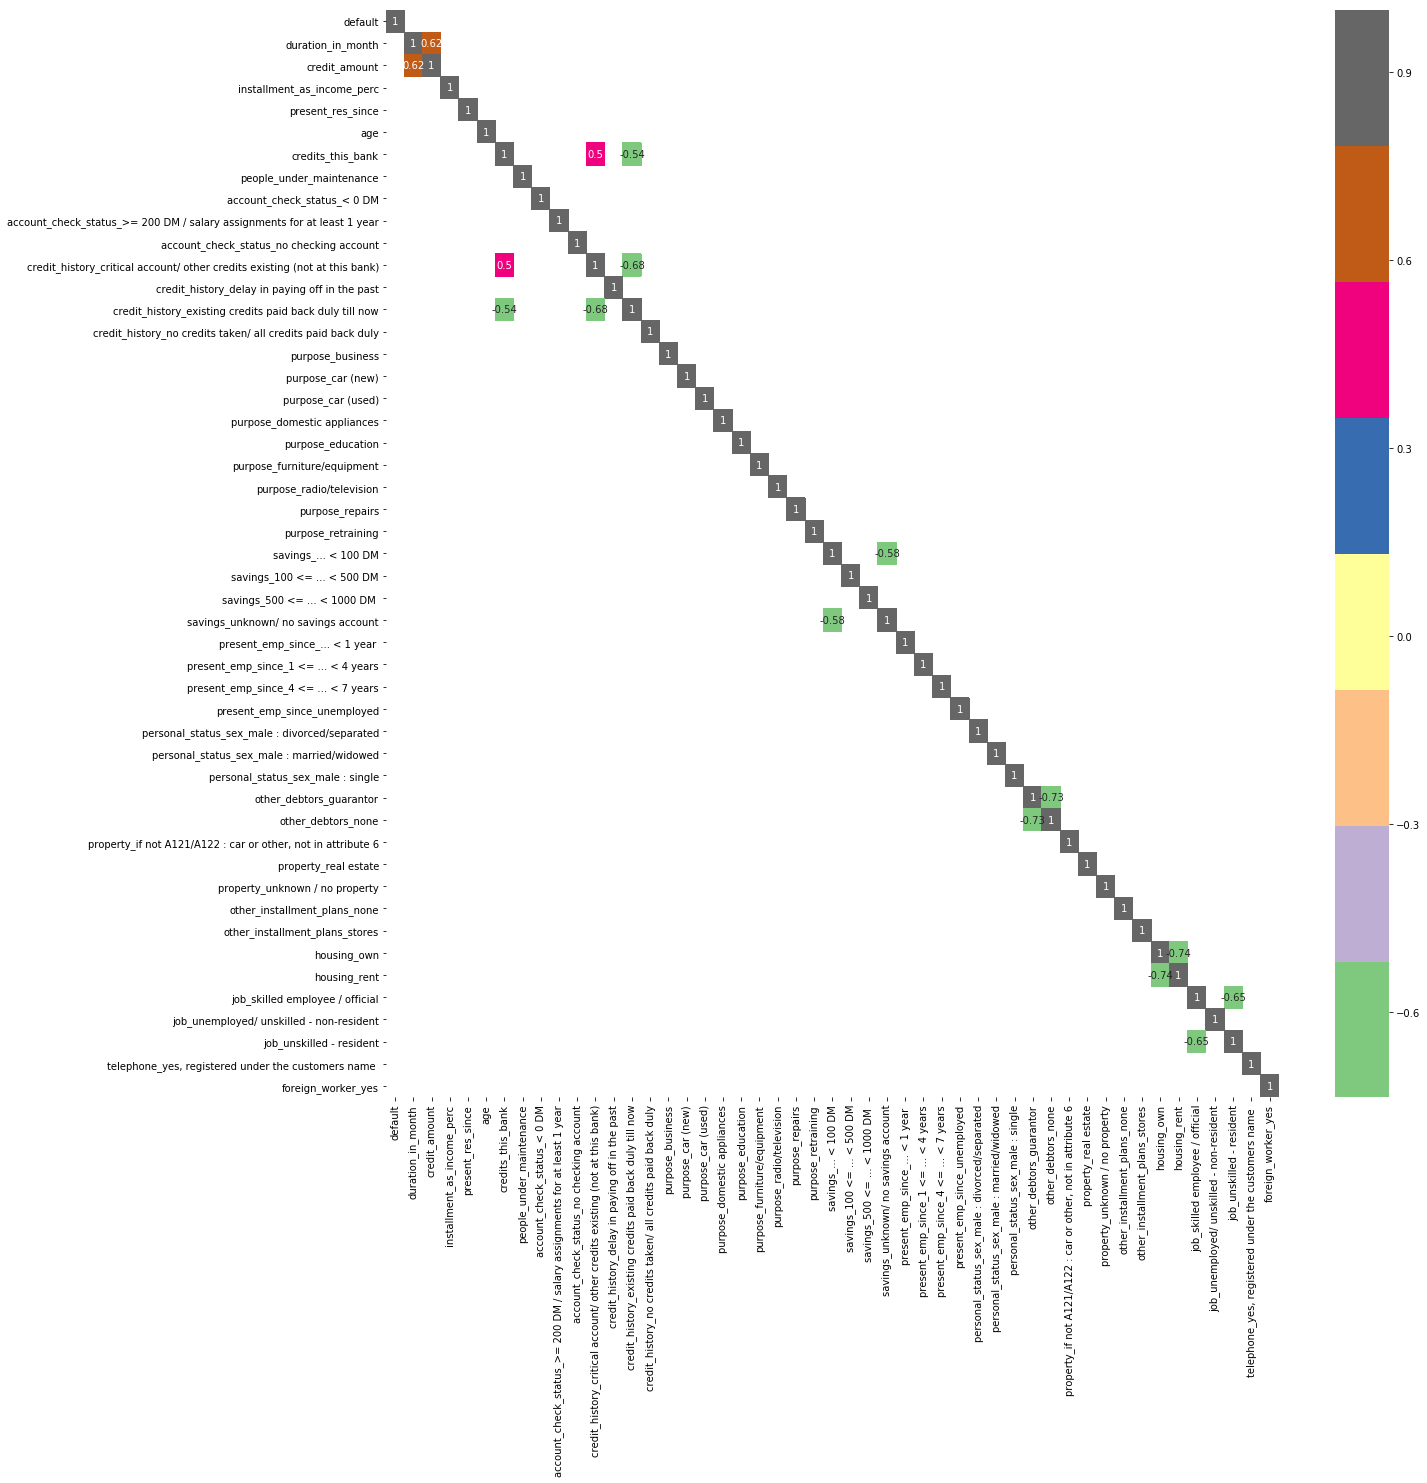

In [33]:
# plot is shown for variable having correlation value >= 0.5 & <= -0.5
fig, ax = plt.subplots(1,1,figsize=(20,20))
sns.heatmap(df_corr[mask],annot=True,ax=ax,cmap='Accent')

##### Inferences: (for corrleation >=0.5 & <=0.5)

* Relations found between the following feature columns
    > 'duration_in_month' & 'credit_amount'
    
    > 'credit_this_bank' vs 'credit_histroy_critical_account/others credit existing(not in this bank)'

* Also, there were -ve correlations among the features, which can be infered from the above
* Target 'default' doesn't have any correlation with any of the feature at this correlation threshold
    

### Drop the original variables which are converted to dummy

In [34]:
df = df.drop(columns=obj_df.columns)

In [35]:
print('data-frame shape after droping the original feature variables after it\'s conversion are {}'.format(df.shape))

data-frame shape after droping the original feature variables after it's conversion are (1000, 49)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_< 0 DM                                                   1000 non-null uint8
account_chec

In [37]:
sns.pairplot(data=df,hue='default')

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [38]:
X = df.drop(columns='default')
y = df['default']

In [39]:
X_scaled = X.apply(zscore)

In [40]:
x_train, x_test, y_train,y_test = train_test_split(X_scaled,y, test_size=0.30, random_state=3)

In [41]:
print('Train size:{} {}'.format(x_train.shape,y_train.shape))
print('Test size:{} {}'.format(x_test.shape,y_test.shape))

Train size:(700, 48) (700,)
Test size:(300, 48) (300,)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [42]:
rfc = RandomForestClassifier(n_estimators = 50, criterion="entropy", n_jobs=2, random_state=9999)
rfc = rfc.fit(x_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [43]:
y_test_predicted = rfc.predict(x_test)

Model's accuracy score

In [44]:
accuracy_score(y_test,y_test_predicted)

0.7466666666666667

Confusion matrix

In [45]:
confusion_matrix(y_test,y_test_predicted)

array([[198,  17],
       [ 59,  26]], dtype=int64)

In [46]:
y_test.value_counts()

0    215
1     85
Name: default, dtype: int64

##### Inferences for confusion matrix:

    TP :26, TN:198, fn:59, fp:17
    
    Of 85 defaulters, model has predicted 
        Only 26 of them correclty as defaulters, 
        59 of them was predicted as non-defaulters
    
    Of 215 non-defaulters, model has predicted 
        198 of them correclty as non-defaulters, 
        17 of them was predicted as defaulters
        
From confusion matrix it can be inferred, accuracy of ~75% doesn't make sense here as model could not predict most of the defaulters sample correctly

### Q6 Show the list of the features importance( 1 Marks)

In [47]:
df_fi = pd.DataFrame(rfc.feature_importances_,columns=['Feature importances'])
df_fi['Feature name'] = X.columns
df_fi = df_fi.set_index('Feature name')
df_fi

,Feature importances
Feature name,
duration_in_month,0.089785
credit_amount,0.110516
installment_as_income_perc,0.042376
present_res_since,0.040218
age,0.098844
credits_this_bank,0.018813
people_under_maintenance,0.015084
account_check_status_< 0 DM,0.033661
account_check_status_>= 200 DM / salary assignments for at least 1 year,0.009535


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

# Use below values
num_folds = 10
seed = 77

#### As a part Q8 confusion matrix was asked, hence for k-folds/cross validation using the 70% train-set got from train_test_split() above.

#### Later in the Q8, based on the model built 30% test data will be used for calculating the score, accuracies & confusion matrix

In [48]:
x_train_arr = np.array(x_train)
y_train_arr = np.array(y_train)

In [49]:
x_train_arr.shape


(700, 48)

In [50]:
y_train_arr.shape

(700,)

In [51]:
kf = KFold(n_splits=10, shuffle=True, random_state=77)

In [52]:
score = []
rfc_kf = RandomForestClassifier(n_estimators = 50, criterion="entropy", n_jobs=2, random_state=9999)

for train_index, test_index in kf.split(x_train_arr,y_train_arr):
    kf_x_train = x_train_arr[train_index]
    kf_x_test  = x_train_arr[test_index]
    kf_y_train = y_train_arr[train_index]
    kf_y_test =  y_train_arr[test_index]
    rfc_kf = rfc_kf.fit(kf_x_train,kf_y_train)
    score.append(rfc_kf.score(kf_x_test,kf_y_test))   

score

[0.7,
 0.8,
 0.8571428571428571,
 0.6714285714285714,
 0.7571428571428571,
 0.8,
 0.6714285714285714,
 0.8,
 0.7571428571428571,
 0.8]

In [53]:
#Calculate Mean score

In [54]:
print('Randomforest Tree mean score for k=10 folds is\t:%.2f%%'%(np.mean(score)*100))

Randomforest Tree mean score for k=10 folds is	:76.14%


In [55]:
# Calculate score standard deviation using std()

In [56]:
np.std(score)

0.05926419575054728

#### cross_val_score

In [57]:
rfc_cv = RandomForestClassifier(n_estimators = 50, criterion="entropy", n_jobs=2, random_state=9999)
cv_score = cross_val_score(rfc_cv, x_train_arr, y_train_arr, cv=10)
cv_score

array([0.70422535, 0.74647887, 0.77464789, 0.73239437, 0.77464789,
       0.82608696, 0.75362319, 0.84057971, 0.75362319, 0.7826087 ])

In [58]:
np.mean(cv_score)*100

76.88916105327618

In [59]:
np.std(cv_score)

0.03891949786622052

#### Observation:

For the same dataset got from train_test_split(in the ratio of training set 70% : test set 30%)
* The model\'s accuracy score for training set is ~75%
* Model\'s k-fold mean score is also 76%
* Model\'s cross_val score is also ~77%

# Q8 Print the confusion matrix( 1 Marks)

##### Using the model's k-fold instance on test data-set

In [60]:
rfc_kf.feature_importances_

array([0.08657799, 0.12307426, 0.03927082, 0.04064812, 0.09121527,
       0.01935911, 0.01171667, 0.02700377, 0.00868262, 0.05884603,
       0.02431549, 0.01397287, 0.01552428, 0.01658393, 0.00966937,
       0.01956147, 0.01342685, 0.01617058, 0.0032644 , 0.00199475,
       0.01501621, 0.00167709, 0.00052285, 0.02331554, 0.00999417,
       0.00765296, 0.01862337, 0.01982206, 0.01570789, 0.01232094,
       0.01083964, 0.00803789, 0.00620631, 0.01906396, 0.00846769,
       0.01084245, 0.01753012, 0.01547971, 0.01496283, 0.02513163,
       0.00909698, 0.01694832, 0.01092864, 0.01918183, 0.00183404,
       0.01137722, 0.02167147, 0.00686754])

In [61]:
rfc_kf.score(x_test,y_test)

0.7533333333333333

In [62]:
y_test_predicted =  rfc_kf.predict(x_test)

In [63]:
confusion_matrix(y_test,y_test_predicted)

array([[190,  25],
       [ 49,  36]], dtype=int64)

##### Inferences for confusion matrix:

    TP :36, TN:190, fn:49, fp:25
    
    Of 85 defaulters, model has predicted 
        36 of them correclty as defaulters, 
        49 of them was predicted as non-defaulters
    
    Of 215 non-defaulters, model has predicted 
        190 of them correclty as non-defaulters, 
        25 of them was predicted as defaulters
        
From confusion matrix it can be inferred, accuracy of ~75% doesn't make sense here as model could not predict most of the defaulters sample correctly

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [64]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       215
           1       0.59      0.42      0.49        85

   micro avg       0.75      0.75      0.75       300
   macro avg       0.69      0.65      0.67       300
weighted avg       0.74      0.75      0.74       300



In [65]:
# For class-1 recall/precision score are
tp = 36
tn = 190 
fn = 49
fp= 25

recall_score = (tp/(tp+fn))
precision_Score = (tp/(tp+fp))
print('For class-1 recall and precision score are :(%.2f, %.2f)'%(recall_score,precision_Score))

For class-1 recall and precision score are :(0.42, 0.59)


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [66]:
#Hint: Use roc_curve

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

#### Get the optimal class probability threshold from train set 

#### Assume that probably RF model's k-folds instance model can't be used as there are more training sets, hence used the actual model instance on the train set to get the optimal probability and using that optimal probability on the test data-set for deriving the optimal scores.


In [67]:
y_train_prob = rfc.predict_proba(x_train)
prob = y_train_prob[:,1]
    
fpr, tpr, thresholds = roc_curve(y_train,prob)
    
optimal_F1 = 0
optimal_ProbTh = 0
for th in thresholds:
    label_predicted = np.where(prob > th, 1, 0)
    f1Score = f1_score(y_train, label_predicted)
    if(optimal_F1 < f1Score):
        optimal_F1 = f1Score
        optimal_ProbTh = th
    
print('\n Optimal Probability threshold is:%f\n'%(optimal_ProbTh))



 Optimal Probability threshold is:0.380000



In [68]:
y_prob = rfc_kf.predict_proba(x_test)
prob = y_prob[:,1]
label_predicted = np.where(prob > optimal_ProbTh, 1, 0)

acc_sc = accuracy_score(y_test,label_predicted)
print(confusion_matrix(y_test,label_predicted))
print('\n')
print('Optimised Accuracy score:%f'%(acc_sc))
print(classification_report(y_test, label_predicted))


    

[[164  51]
 [ 35  50]]


Optimised Accuracy score:0.713333
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       215
           1       0.50      0.59      0.54        85

   micro avg       0.71      0.71      0.71       300
   macro avg       0.66      0.68      0.66       300
weighted avg       0.73      0.71      0.72       300



##### Inferences for confusion matrix:

    TP :50, TN:164, fn:35, fp:51
    
    Of 85 defaulters, model has predicted 
        50 of them correclty as defaulters, 
        35 of them was predicted as non-defaulters
    
    Of 215 non-defaulters, model has predicted 
        164 of them correclty as non-defaulters, 
        50 of them was predicted as defaulters
        
* From confusion matrix predicted now and earlier it can be inferred TP increases (as well FP too increase) with optimal class probability threshold. 


* Also earlier class-1 scores were 
    > precision: 0.59      
    > recall: 0.42      
    > f1: 0.49           
    > accuracy score: 75%
       
  
* Whereas, now the optimal class-1 scores are

    > precision: 0.50      
    > recall: 0.59      
    > f1: 0.54           
    > accuracy score: 71%
    

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [69]:
# AUC for test data-set
fpr, tpr, thresholds = roc_curve(y_test,prob)
area_under_curve = auc(fpr,tpr)

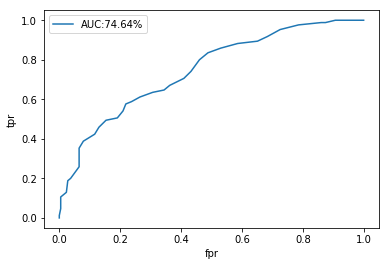

In [70]:
plt.plot(fpr,tpr,label='AUC:%.2f%%'%(area_under_curve*100))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [71]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [72]:
from sklearn.utils import resample

for i in range(bootstrap_iteration):
    X_, y_ = resample(x_train, y_train)
    rfc.fit(X_, y_)
    y_pred = rfc.predict(x_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [73]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7373333333333333
Standard deviation:  0.015549205052920812


### EOF